<a href="https://colab.research.google.com/github/DajeanArcila/DajeanArcila/blob/main/Regresion_logistica_pagamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#REGRESION LOGISTITA

MODELO DE REGRESION LINEAL PARA TRABAJAR CON VARIABLES CATEGORICAS, EN ESTE EJEMPLO HIZIMOS UN DATA SET FICTICION DE PAGOS DE BANCOS Y APLICAMOS EL MODELO Y AL FINAL LO HACEMOS UNA FUNCION PARA LLAMARLA CON DATOS NUEVOS SIEMPRE Y CUANDO TENGAN LA MISMA ESTRUCTURA DE LOS DATOS DE ENTRENAMIENTO


In [11]:
#DATOS FICTICIOS
import pandas as pd
import numpy as np

##PARA TRABAJAR EN EL MODELO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Crear un dataset sintético
np.random.seed(42)
n_samples = 1000

# Características (features)
X = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, n_samples),
    'Feature2': np.random.normal(2, 3, n_samples),
    'Feature3': np.random.uniform(0, 1, n_samples)
})

In [12]:
# Variable objetivo (target)
# Supongamos una variable objetivo binaria
y = np.random.choice([0, 1], size=n_samples)

# Crear un DataFrame con X y y
df = pd.concat([X, pd.Series(y, name='Target')], axis=1)

# Ver las primeras filas del dataset generado
print(df.head())

# Guardar el dataset como CSV
df.to_csv('ejemplo_dataset.csv', index=False)

# Información del dataset
print(df.info())

   Feature1  Feature2  Feature3  Target
0  0.496714  6.198066  0.407106       0
1 -0.138264  4.773901  0.066010       0
2  0.647689  2.178891  0.348821       1
3  1.523030  0.059190  0.110998       1
4 -0.234153  4.094670  0.808235       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   float64
 1   Feature2  1000 non-null   float64
 2   Feature3  1000 non-null   float64
 3   Target    1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None


In [13]:
# Cargar el dataset (puedes reemplazar la ruta con la ubicación de tu dataset)
df = pd.read_csv('/content/ejemplo_dataset.csv')

In [16]:
# Mostrar las primeras filas del dataset
print(df.head())

   Feature1  Feature2  Feature3  Target
0  0.496714  6.198066  0.407106       0
1 -0.138264  4.773901  0.066010       0
2  0.647689  2.178891  0.348821       1
3  1.523030  0.059190  0.110998       1
4 -0.234153  4.094670  0.808235       1


In [17]:
# Descripción básica del dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   float64
 1   Feature2  1000 non-null   float64
 2   Feature3  1000 non-null   float64
 3   Target    1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None
          Feature1     Feature2     Feature3       Target
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.019332     2.212509     0.496848     0.503000
std       0.979216     2.992363     0.290318     0.500241
min      -3.241267    -6.821166     0.000012     0.000000
25%      -0.647590     0.181275     0.247505     0.000000
50%       0.025301     2.189231     0.500502     1.000000
75%       0.647944     4.186647     0.748227     1.000000
max       3.852731    11.579323     0.998893     1.000000


In [19]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop('Target', axis=1)  # características
y = df['Target']  # variable objetivo

In [20]:
# Dividir el dataset en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo de Regresión Logística
model = LogisticRegression()

In [21]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [22]:
# Evaluar el rendimiento del modelo
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[80 65]
 [88 67]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.48      0.55      0.51       145
           1       0.51      0.43      0.47       155

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300




Precisión del modelo:
0.49


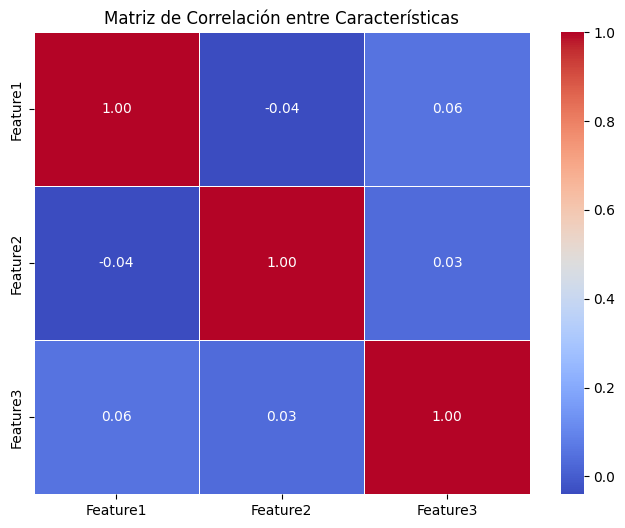

In [23]:
print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))

# Opcional: Visualización de la matriz de correlación entre características
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Características')
plt.show()

In [ ]:
def logistic_regression_pipeline(train_input_path, test_input_path, output_path):
    # Cargar el dataset de entrenamiento
    df_train = pd.read_csv(train_input_path)

    # Mostrar las primeras filas del dataset para verificar la carga correcta
    #print(df_train.head())

    # Descripción básica del dataset
    #print(df_train.info())
    #print(df_train.describe())
    #PODEMOS DESCOMENTAR ESTOS DATOS SI SON NECESARIOS

    # Separar las características (X) y la variable objetivo (y) del dataset de entrenamiento
    X_train = df_train.drop('Target', axis=1)  # características
    y_train = df_train['Target']  # variable objetivo

    # Cargar el dataset de nuevos datos (sin la variable objetivo)
    df_test = pd.read_csv(test_input_path)

    # Mostrar las primeras filas del dataset de nuevos datos
    print(df_test.head())

    # Inicializar el modelo de Regresión Logística
    model = LogisticRegression()

    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de nuevos datos
    predictions = model.predict(df_test)

    # Guardar las predicciones en un archivo CSV
    results = pd.DataFrame({'Prediction': predictions})
    results.to_csv(output_path, index=False)

# Llamar a la función con las rutas de los archivos de entrada y salida
train_input_path = 'LOS DATOS PRINCIPALES CON QUE SE HIZO EL MODELO.csv'  # Asegúr de que el archivo de entrenamiento esté en la ubicación correcta
test_input_path = 'NUEVOS_DATOS.csv'  # Asegúrate de que el archivo de nuevos datos esté en la ubicación correcta
output_path = 'Resultados_PRedicciones.csv'  # Nombre del archivo de salida

logistic_regression_pipeline(train_input_path, test_input_path, output_path)